In [92]:
import requests
import pandas as pd

url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {"vs_currency": "usd", "days": "365", "interval": "daily"}
response = requests.get(url, params=params)
data = response.json()

# Extract prices and convert to DataFrame
prices = data["prices"]
df = pd.DataFrame(prices, columns=["timestamp", "price"])
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")

print(df.head())  # Display first few rows


   timestamp         price
0 2024-03-30  69919.055461
1 2024-03-31  69702.308747
2 2024-04-01  71246.951441
3 2024-04-02  69785.925038
4 2024-04-03  65440.419226


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df["scaled_price"] = scaler.fit_transform(df["price"].values.reshape(-1,1))

# Create sequences for training
sequence_length = 30  # Use past 30 days to predict next day
X, y = [], []

for i in range(len(df) - sequence_length):
    X.append(df["scaled_price"].iloc[i:i+sequence_length].values)
    y.append(df["scaled_price"].iloc[i+sequence_length])

X, y = np.array(X), np.array(y)

print("Input shape:", X.shape)  # Should be (num_samples, 30)


Input shape: (336, 30)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)
])

model.compile(optimizer="adam", loss="mean_squared_error")
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 30, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X, y, epochs=50, batch_size=16)


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1473
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0233
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0114
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0117
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0104
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0084
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0083
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0071
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0074
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0085
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0071
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0053
Epoch 13/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0064
Epoch 14/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0072
Epoch 15/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0051
Epoc

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


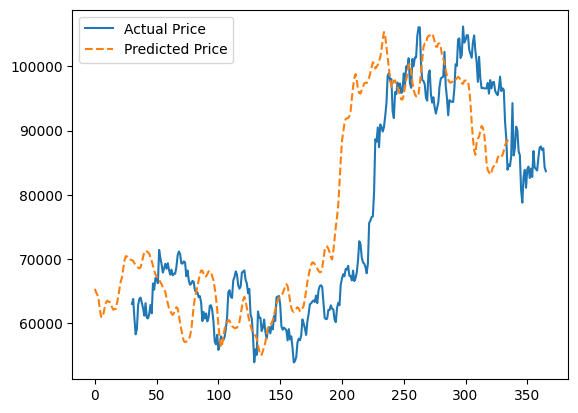

In [ ]:
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)  # Convert back to actual price

# Compare with actual price
import matplotlib.pyplot as plt

plt.plot(df["price"].iloc[sequence_length:], label="Actual Price")
plt.plot(predictions, label="Predicted Price", linestyle="dashed")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import requests

# Load Bitcoin price data
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
import requests
import pandas as pd

url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {"vs_currency": "usd", "days": "365", "interval": "daily"}
response = requests.get(url, params=params)
data = response.json()

# Extract prices and convert to DataFrame
prices = data["prices"]
df = pd.DataFrame(prices, columns=["timestamp", "price"])
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")

print(df.head())  # Display first few rows
data = requests.get(url, params=params).json()

# Check if API returned an error
if "error" in data:
    print(f"API Error: {data['error']}")
    # Handle the error, e.g., exit or retry
else:
    # Convert to DataFrame
    prices = data["prices"]
    df = pd.DataFrame(prices, columns=["timestamp", "price"])
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")

    # Normalize the prices (LSTMs work better with scaled data)
    scaler = MinMaxScaler(feature_range=(0, 1))
    df["scaled_price"] = scaler.fit_transform(df["price"].values.reshape(-1, 1))

    # Convert to sequences for LSTM training
    sequence_length = 30  # Use past 30 days to predict next day
    X, y = [], []

    for i in range(len(df) - sequence_length):
        X.append(df["scaled_price"].iloc[i:i + sequence_length].values)
        y.append(df["scaled_price"].iloc[i + sequence_length])

    X, y = np.array(X), np.array(y)

    # Reshape input for LSTM (samples, time steps, features)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    print("Training data shape:", X.shape, y.shape)  # Should be (samples, 30, 1)

   timestamp         price
0 2024-03-30  69919.055461
1 2024-03-31  69702.308747
2 2024-04-01  71246.951441
3 2024-04-02  69785.925038
4 2024-04-03  65440.419226
Training data shape: (336, 30, 1) (336,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)  # Output layer (predict next day's price)
])

model.compile(optimizer="adam", loss="mean_squared_error")
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 30, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X, y, epochs=50, batch_size=16)


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0595
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0124
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0103
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0070
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0090
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0085
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0081
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0081
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0066
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0077
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0063
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0063
Epoch 13/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0063
Epoch 14/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0061
Epoch 15/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0065
Epoc

In [ ]:
# Select last 30 days as input for prediction
last_30_days = df["scaled_price"].iloc[-30:].values.reshape(1, -1, 1)

# Predict next day's price
predicted_scaled_price = model.predict(last_30_days)

# Convert back to actual price
predicted_price = scaler.inverse_transform(predicted_scaled_price)[0][0]

print(f"Predicted Bitcoin Price for Next Day: ${predicted_price:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
Predicted Bitcoin Price for Next Day: $85827.85


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


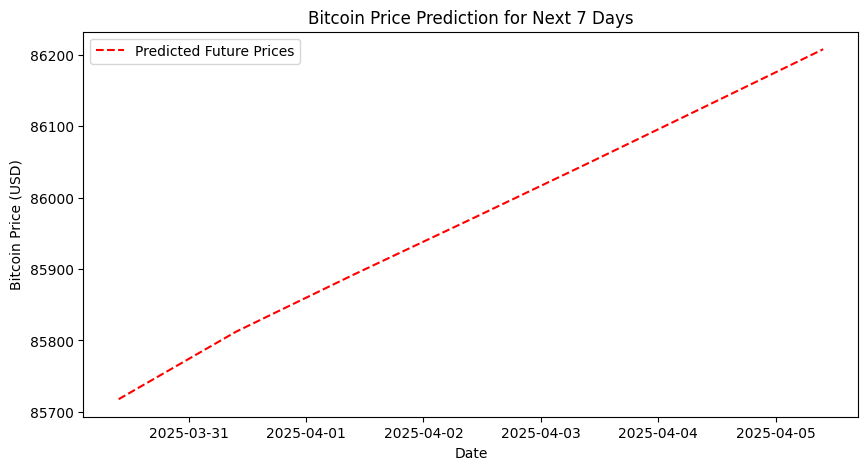

In [ ]:
future_input = df_scaled[-30:].reshape(1, -1, X.shape[2])  # Use last 30 days

future_predictions = []
for _ in range(7):  # Predict next 7 days
    pred_scaled = model.predict(future_input)
    future_predictions.append(pred_scaled[0, 0])

    # Shift input and add prediction
    new_input = np.append(future_input[:, 1:, :], pred_scaled.reshape(1, 1, X.shape[2]), axis=1)
    future_input = new_input

# Convert back to USD prices
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, X.shape[2]))[:, 0]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(pd.date_range(start=df["timestamp"].iloc[-1] + pd.Timedelta(days=1), periods=7), future_predictions, label="Predicted Future Prices", linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Bitcoin Price (USD)")
plt.legend()
plt.title("Bitcoin Price Prediction for Next 7 Days")
plt.show()


In [ ]:
model.save("/content/crypto_lstm_model.keras")


In [ ]:
import os
print(os.listdir("/content/"))


['.config', 'crypto_lstm_model.h5', 'crypto_lstm_model.keras', 'sample_data']


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pickle

# Example: Recreate training data (Replace this with your actual training dataset)
training_data = np.random.rand(1000, 3)  # 1000 samples, 3 features

# Fit a new MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(training_data)

# Save the fitted scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Scaler has been refitted and saved!")


✅ Scaler has been refitted and saved!


In [ ]:
# Load fitted scaler
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Ensure scaler is fitted
if not hasattr(scaler, "data_min_"):
    raise ValueError("🚨 The MinMaxScaler is still not fitted!")

print("✅ Model and Scaler Loaded!")

# Now you can safely use inverse_transform()


✅ Model and Scaler Loaded!


In [ ]:
from google.colab import files
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle

# Load the .pkl file
with open("scaler.pkl", "rb") as file:
    data = pickle.load(file)

# Display the type of data
print("✅ Data Type:", type(data))

# If it's a dictionary or list, print keys
if isinstance(data, dict):
    print("Keys:", data.keys())
elif isinstance(data, list):
    print("First item sample:", data[0])
else:
    print("Data:", data)


✅ Data Type: <class 'sklearn.preprocessing._data.MinMaxScaler'>
Data: MinMaxScaler()
